# **2nd Project - Intermediate Machine Learning**

**Autor: Arthur Dimitri Brito Oliveira - Capacitação HP**

![](http://)![](http://)![Ames Housing dataset image](https://journal.firsttuesday.us/wp-content/uploads/CA-Tiered-Home-Pricing.png)

# 1. Introdução
* Técnicas de regressão podem ser muito úteis para a obtenção de valores associados a múltiplas variáveis. No contexto do mercado imobiliário, estas técnicas podem ser muito úteis diante de inúmeras características intrínsecas aos imóveis. Propõe-se, neste projeto, a utilização de técnicas de Machine Learning, como *Random Forest Regressor*, para o cálculo do valor dos imóveis associados a características chave do Dataset.


# 2. Objetivos
* Predizer o preço final das casas referentes ao DataSet *Home Data*
* Encontrar o modelo, bem como o conjunto de parâmetros que produz o resultado mais viável, levando em conta a complexidade computacional

# **3. Descrição do DataSet**
* O DataSet contém 79 variáveis autoexplicativas que descrevem quase todos os aspectos de imóveis residenciais na cidade de Ames, Iowa. Muitas delas, como descrito posteriormente, possuem muitos valores ausentes na base de dados. Por isso, abaixo encontra-se uma descrição das variáveis mais significativas/presentes no DataSet. 

#  ***3.1 Variáveis mais significativas***:
*     SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
*     MSZoning: The general zoning classification
*     LotFrontage: Linear feet of street connected to property
*     LotArea: Lot size in square feet
*     Street: Type of road access
*     Alley: Type of alley access
*     LotShape: General shape of property
*     LandContour: Flatness of the property
*     LotConfig: Lot configuration
*     BldgType: Type of dwelling
*     HouseStyle: Style of dwelling
*     OverallQual: Overall material and finish quality
*     YearBuilt: Original construction date
*     YearRemodAdd: Remodel date
*     MasVnrArea: Masonry veneer area in square feet
*     ExterQual: Exterior material quality
*     BsmtQual: Height of the basement
*     BsmtExposure: Walkout or garden level basement walls
*     BsmtFinType1: Quality of basement finished area
*     BsmtFinSF1: Type 1 finished square feet
*     BsmtFinType2: Quality of second finished area (if present)
*     BsmtFinSF2: Type 2 finished square feet
*     BsmtUnfSF: Unfinished square feet of basement area
*     TotalBsmtSF: Total square feet of basement area
*     CentralAir: Central air conditioning
*     1stFlrSF: First Floor square feet
*     2ndFlrSF: Second floor square feet
*     GrLivArea: Above grade (ground) living area square feet
*     BsmtFullBath: Basement full bathrooms
*     FullBath: Full bathrooms above grade
*     HalfBath: Half baths above grade
*     TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*     Functional: Home functionality rating
*     Fireplaces: Number of fireplaces
*     FireplaceQu: Fireplace quality
*     GarageYrBlt: Year garage was built
*     GarageFinish: Interior finish of the garage
*     GarageCars: Size of garage in car capacity
*     GarageArea: Size of garage in square feet
*     GarageCond: Garage condition
*     PavedDrive: Paved driveway
*     WoodDeckSF: Wood deck area in square feet
*     OpenPorchSF: Open porch area in square feet
*     EnclosedPorch: Enclosed porch area in square feet
*     ScreenPorch: Screen porch area in square feet
*     PoolArea: Pool area in square feet
*     PoolQC: Pool quality
*     Fence: Fence quality
*     SaleCondition: Condition of sale


# **3.2 Descrição dos Arquivos**
* train.csv - Dados referentes ao treinamento.
* test.csv - Dados referentes ao teste do modelo.
* data_description.txt - Descrição completa das variáveis.

#  4 Importações de Bibliotecas e Declaração de Funções

 # 4.1 Coleta de Dados
Carregamento dos dados de treinamento e teste.

In [1]:
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 



# 4.2 Importação das bibliotecas necessárias para o projeto
A maior parte delas diz respeito aos métodos de codificação, preprocessamento e avaliação do model****

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import operator
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


# 4.3 Funções desenvolvidas para o preprocessamento/Pipeline
Visando uma automatização do código, estas foram as funções desenvolvidas para facilitar esse processo. Abaixo encontra-se uma descrição rápida de cada uma delas:
* **getNaNDict(dataSet)** - recebe a variável que armazena o conjunto de dados de treinanemto e retorna um dicionário python com o percentual de elementos ausentes.
* **getMostMissing(dictionary,percentual)** - recebe o dicionário de elementos ausentes em percentual, o valor base de *missing* e retorna as colunas acima desse valor percentual.
* **getInconsistentCol(TrainDataSet, ValidationDataSet)** - recebe os datasets de treinamento e validação e retorna as colunas que não estão presentes em ambos.
* **getColumnTypes(TrainDataSetClean)** - recebe o dataset limpo (com colunas não presentes na validação e treinamento removidas) e retorna quais são as colunas categóricas e quais são numéricas.
* **transformerFunctions(encodingType,categorical_columns,numerical_columns)** - recebe o tipo de codificação e as colunas numéricas/categóricas. Retorna a transformação dessas colunas de acordo com o tipo de codificação.
* **myPipelineMaster(X_train_clean,y,X_validation_clean,y_valid,estimators,encodingType,crossValidation)****** - recebe os datasets, quantidade de estimadores, o tipo da codificação. Retorna o modelo, os erros e a predição associada.

A função myPipelineMaster() faz a chamada de todas as outras necessárias para o treinamento do modelo

In [3]:
def getNaNdict(X):
    columns_with_nan = list(X.columns[X.isna().any()])
    count_columns_with_nan = []
    for column in columns_with_nan:
        count_columns_with_nan.append(X[column].isna().sum()/1460*100)

    dict_nan = dict(zip(columns_with_nan,count_columns_with_nan))
    dict_nan = dict(sorted(dict_nan.items(), key=operator.itemgetter(1),reverse=True))
    return dict_nan

def getMostMissing(dict_nan,value):
    columns_to_remove = []
    for percentual in dict_nan.items():
        if percentual[1] > value:
            columns_to_remove.append(percentual[0])
    
    return columns_to_remove

def getInconsistentCol(X_train, X_validation):
    object_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
    good_label_cols = [col for col in object_cols if set(X_train[col]) == set(X_validation[col])]
    bad_label_out = list(set(object_cols) - set(good_label_cols))
    return bad_label_out

def getColumnTypes(X_train_clean):
    categorical_columns = [column for column in X_train_clean.columns if X_train_clean[column].nunique() < 10 and X_train_clean[column].dtype == "object"]
    numerical_columns = [column for column in X_train_clean.columns if X_train_clean[column].dtype in ['int64', 'float64']]
    return categorical_columns,numerical_columns

def transformerFunctions(encodingType,categorical_columns,numerical_columns):
    if encodingType == "OHE":
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        numerical_transformer = SimpleImputer(strategy='constant')

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_columns),
                ('cat', categorical_transformer, categorical_columns)
            ])
        return preprocessor
    
def myPipelineMaster(X_train_clean,y,X_validation_clean,y_valid,estimators,encodingType,crossValidation):
    categorical_columns, numerical_columns = getColumnTypes(X_train_clean)
    preprocessor = transformerFunctions(encodingType, categorical_columns, numerical_columns)
    model = RandomForestRegressor(n_estimators=estimators, random_state=0)
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
    my_pipeline.fit(X_train_clean,y)
    pred = my_pipeline.predict(X_validation_clean)
    scores = -1 * cross_val_score(my_pipeline, X_train_clean, y,cv=crossValidation,scoring='neg_mean_absolute_error')
    error_cv = scores.mean()
    mae = mean_absolute_error(pred,y_valid)
    rmse = mean_squared_error(pred,y_valid)
    return my_pipeline, pred, mae, rmse, error_cv

def runXGB(X_train_clean,X_validation_clean,X_test,n_est,learning_r,jobs):
    X_train_clean = pd.get_dummies(X_train_clean)
    X_validation_clean = pd.get_dummies(X_validation_clean)
    X_test = pd.get_dummies(X_test)
    X_train_clean, X_validation_clean = X_train_clean.align(X_validation_clean, join='left', axis=1)
    X_train_clean, X_test = X_train_clean.align(X_test, join='left', axis=1)

    model = XGBRegressor(n_estimators=n_est, learning_rate=learning_r, n_jobs=jobs)
    model.fit(X_train_clean, y_train_clean,
                  early_stopping_rounds=20,
                  eval_set=[(X_validation_clean, y_validation_clean)],
                  verbose = False) 

    predictions_2 = model.predict(X_validation_clean)
    mae_2 = mean_absolute_error(predictions_2, y_validation_clean) 

    return mae_2,model

# 4.5 Leitura dos dados
* Separação entre dados de treinamento, teste e *target*

In [4]:
X = pd.read_csv('../input/train.csv', index_col='Id')
y = X.SalePrice
X_test = pd.read_csv('../input/test.csv', index_col='Id')

# 5 Análise Exploratória dos Dados

Buscando uma visão geral do Dataset, em termos das variáveis e de estatísticas, tem-se:

# 5.1 Descrição Estatística das Variáveis

In [5]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


O que pode-se observar acima é que os preços de venda variam bastante. Observando o desvio padrão associado à variável SalePrice, o valor médio varia quase $79.5k


# 5.2 Análise de Correlação das Variáveis com *SalePrice*
As variáveis estão correlacionadas. No entanto, algumas tem pouca influência no SalePrice. Analisando as variáveis que possuem correlação, em módulo, inferior a 0.3 (as consideravelmente relacionadas), e posteriormente armazenando as variáveis com correlação inferior a 0.1 em uma lista, denominada de 'low_correlation', tem-se:

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

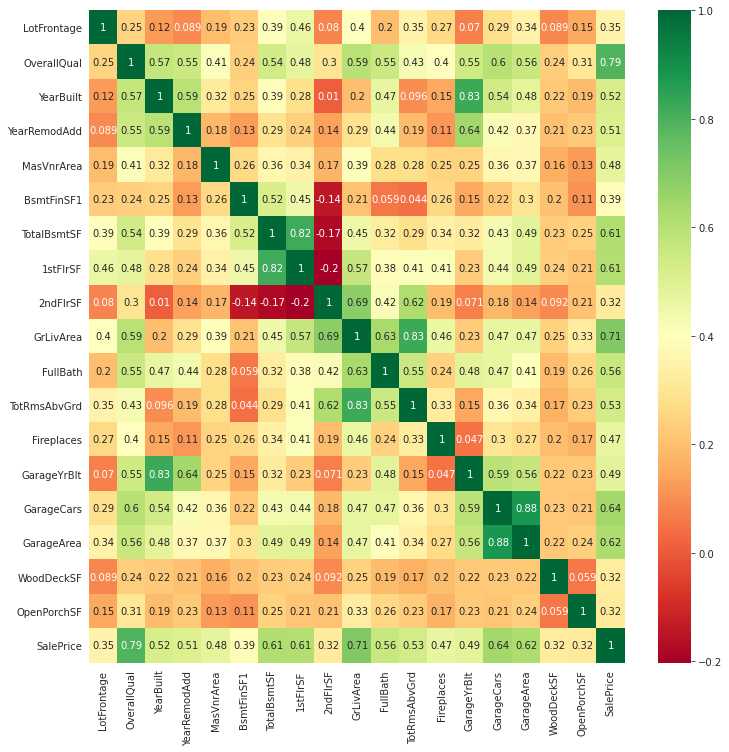

In [7]:
corrmat = X.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.3]
sns.set_style("white")
plt.figure(figsize=(12,12))

g = sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")
low_correlation = list(corrmat.index[abs(corrmat["SalePrice"])<0.1])
low_correlation

Assim, o que pode-se observar é que as variáveis 'OverallQual', 'GrLivArea', 'GarageArea' e 'GarageCars' têm uma correlação muito forte com o preço de venda. Outras também tem uma correlação considerável com SalePrice. No entanto, a atenção será voltada para as variáveis com baixa correlação, e estas serão posteriormente removidas do DataSet. 

Analisando agora a relação da variável 'OverallQual' (maior correlação) com 'SalePrice', tem-se:

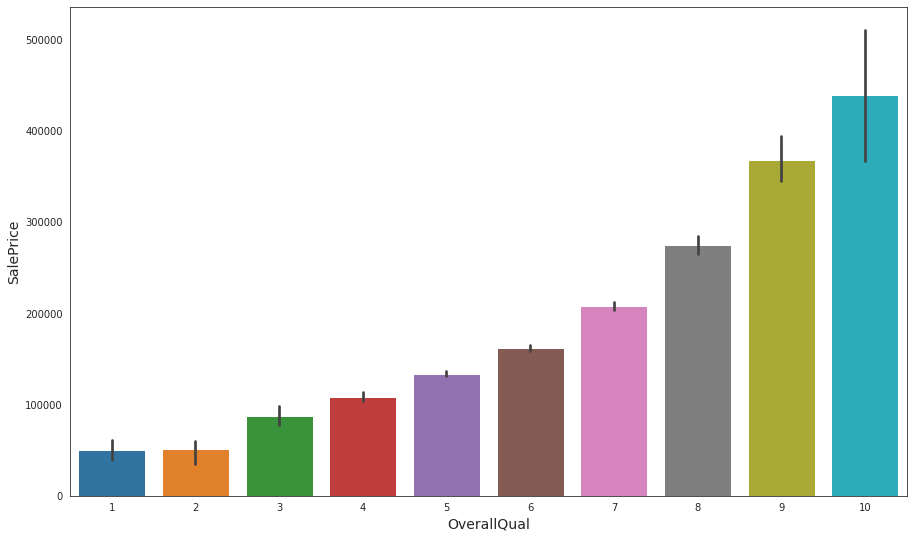

In [8]:
plt.figure(figsize=(15,9))
plt.xlabel("OverallQuality",fontsize=14)
plt.ylabel("SalePrice",fontsize=14)
sns.barplot(X.OverallQual,X.SalePrice)
plt.show()

Ou seja, quanto mais bem avaliado é o material de construção/acabamento do imóvel, mais o desvio padrão do preço varia associadamente.

# 5.3 Análise de Valores Ausentes
Verificando quais colunas tem elementos faltando:

In [9]:
dict_nan = getNaNdict(X)
dict_nan
#train_data.head()

{'PoolQC': 99.52054794520548,
 'MiscFeature': 96.30136986301369,
 'Alley': 93.76712328767123,
 'Fence': 80.75342465753424,
 'FireplaceQu': 47.26027397260274,
 'LotFrontage': 17.73972602739726,
 'GarageType': 5.5479452054794525,
 'GarageYrBlt': 5.5479452054794525,
 'GarageFinish': 5.5479452054794525,
 'GarageQual': 5.5479452054794525,
 'GarageCond': 5.5479452054794525,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType2': 2.6027397260273974,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtFinType1': 2.5342465753424657,
 'MasVnrType': 0.547945205479452,
 'MasVnrArea': 0.547945205479452,
 'Electrical': 0.0684931506849315}

Plotando um gráfico de barras, que relaciona o percentual de falta por variável, tem-se:

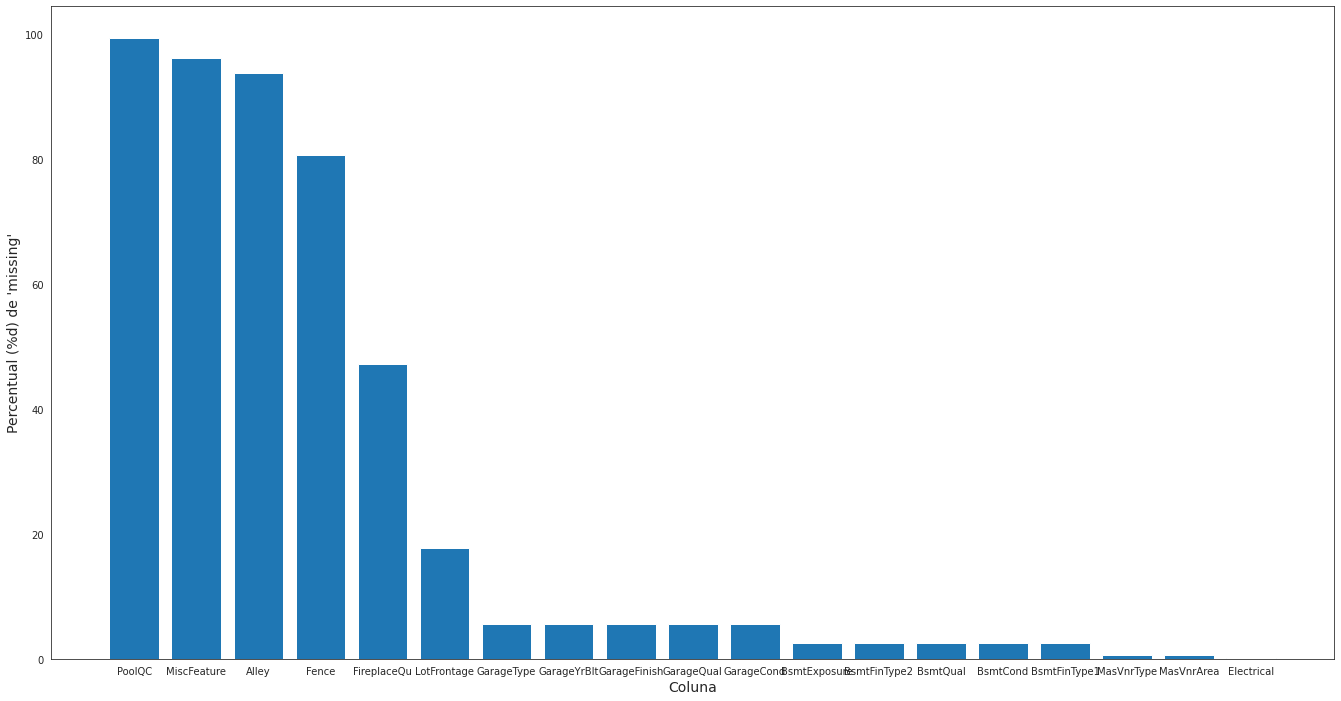

In [10]:
plt.figure(figsize=(23,12))
sns.set_style("white")
plt.xlabel("Coluna",fontsize=14)
plt.ylabel("Percentual (%d) de 'missing'",fontsize=14)
plt.bar(*zip(*dict_nan.items()))
plt.show()


Elencando colunas com mais de 15% e com mais de 80% de valores ausentes:

In [11]:
columns_to_remove = getMostMissing(dict_nan,15)
columns_to_remove

columns_to_remove_2 = getMostMissing(dict_nan,80)
columns_to_remove_2


['PoolQC', 'MiscFeature', 'Alley', 'Fence']

# 6 Preprocessamento
Separando 80% do dataset de treinamento para treinar o modelo, e 20% para validação, tem-se:

In [12]:
X_train, X_validation, y_train, y_valid = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=0)

# 6.1 Abordagens Para Treinamento - Remoção de Colunas
Visando a análise com diferentes features, foram elaboradas abordagens para remoção de características. Estas abordagens são representadas pelas seguintes variáveis:

* all_to_remove - colunas com mais de 15% de ausência de valores + colunas que não estão presentes em na validação e teste.
* all_to_remove_2 - colunas com mais de 80% de ausência de valores + colunas que não estão presentes em na validação e teste.
* all_to_remove_3 - colunas que não estão presentes em na validação e teste + colunas com correlação relacionada a SalePrice inferior a 0.1


In [13]:
bad_label_out = getInconsistentCol(X_train,X_validation)
#columns_to_remove.append(bad_label_out)
all_to_remove = columns_to_remove + bad_label_out
all_to_remove.append('SalePrice')
all_to_remove_2 = columns_to_remove_2 + bad_label_out
all_to_remove_2.append('SalePrice')

all_to_remove_3 = bad_label_out + low_correlation
all_to_remove_3.append('SalePrice')

Removendo colunas problemáticas e atribuindo os novos datasets a variáveis com '_clean', tem-se:

In [14]:
y_train_clean = X_train.SalePrice
X_train_clean = X_train.drop(all_to_remove ,axis=1,errors='ignore')
y_validation_clean = X_validation.SalePrice
X_validation_clean = X_validation.drop(all_to_remove,axis=1,errors='ignore')
X_original_clean = X.drop(all_to_remove,axis=1,errors='ignore')



y_train_clean_2 = X_train.SalePrice
X_train_clean_2 = X_train.drop(all_to_remove_2 ,axis=1,errors='ignore')
y_validation_clean_2 = X_validation.SalePrice
X_validation_clean_2 = X_validation.drop(all_to_remove_2,axis=1,errors='ignore')

y_train_clean_3 = X_train.SalePrice
X_train_clean_3 = X_train.drop(all_to_remove_3 ,axis=1,errors='ignore')
y_validation_clean_3 = X_validation.SalePrice
X_validation_clean_3 = X_validation.drop(all_to_remove_3,axis=1,errors='ignore')


As variáveis com '_clean_' podem ser classificadas de acordo com a abordagem:
* '_clean' - abordagem 1
* '_clean_2' - abordagem 2
* '_clean_3' - abordagem 3

# 7 Pipeline

# 7.1 Random Forest Regressor
Abaixo aplicam-se as técnicas de codificação e inicia-se o processo de treinamento por meio da função myPipelineMaster(), previamente declarada. O objetivo é variar o parametro n_estimators do modelo RandomForestRegressor, de 100 a 800, com pace de 50, e observar o erro absoluto médio (MAE). E, a partir disso, decidir qual número de estimadores produz o melhor resultado na validação.

In [15]:
forests = []
maes_1 = []
models_1 = []
maes_2 = []
models_2 = []
maes_3 = []
models_3 = []

for forest in range(100,800,50):
    modelo,pred,mae_1, rmse_1, error_cv = myPipelineMaster(X_train_clean,y_train_clean,X_validation_clean,y_validation_clean,forest,'OHE',5)
    modelo_2,pred_2,mae_2, rmse_2, error_cv_2 = myPipelineMaster(X_train_clean_2,y_train_clean_2,X_validation_clean_2,y_validation_clean_2,forest,'OHE',5)
    modelo_3,pred_3,mae_3, rmse_3, error_cv_3 = myPipelineMaster(X_train_clean_3,y_train_clean_3,X_validation_clean_3,y_validation_clean_3,forest,'OHE',5)
    forests.append(forest)
    maes_1.append(mae_1)
    models_1.append(modelo)
    maes_2.append(mae_2)
    models_2.append(modelo_2)
    maes_3.append(mae_3)
    models_3.append(modelo_3)
forests

[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750]

In [16]:
model_1_dict = dict(zip(forests,models_1))
model_2_dict = dict(zip(forests,models_2))
model_3_dict = dict(zip(forests,models_3))

Plotando a curva do MAE:

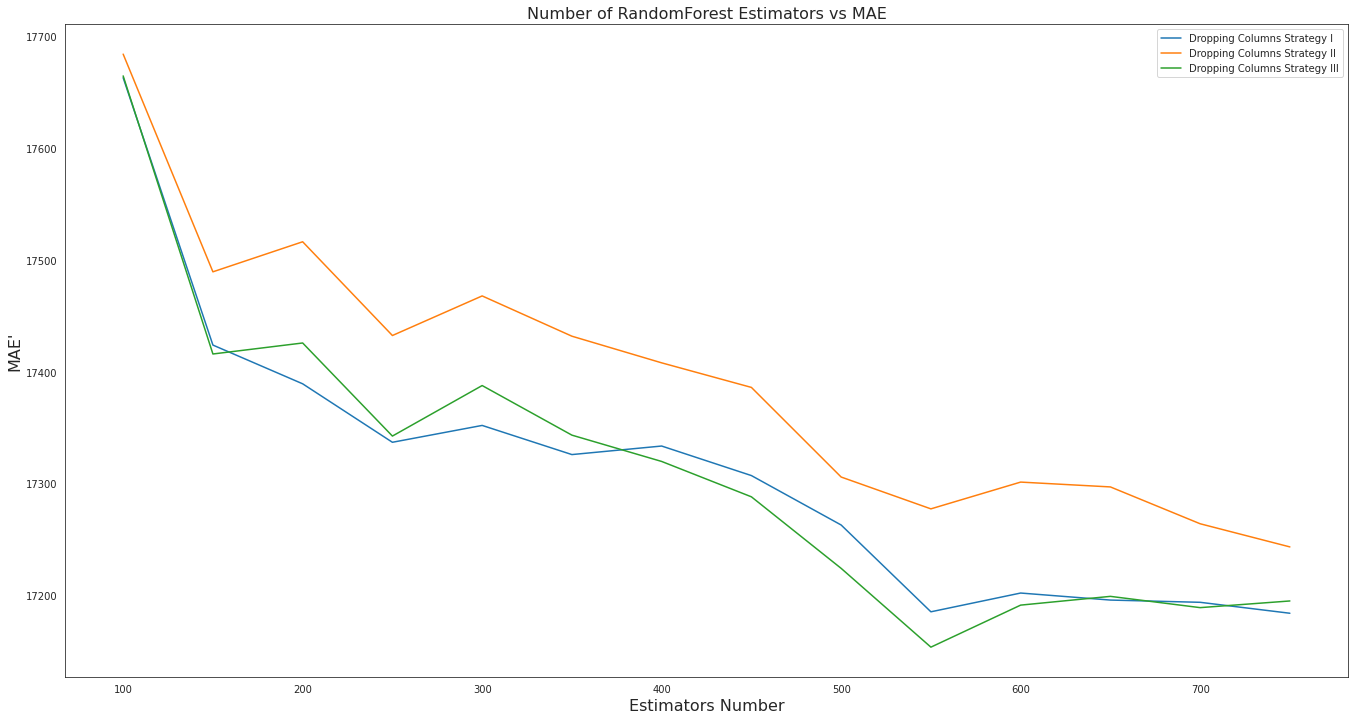

In [17]:
plt.figure(figsize=(23,12))
sns.set_style("white")
plt.xlabel("Estimators Number",fontsize=16)
plt.ylabel("MAE'",fontsize=16)
plt.title("Number of RandomForest Estimators vs MAE",fontsize=16)
plt.plot(forests,maes_1,label="Dropping Columns Strategy I")
plt.plot(forests,maes_2,label="Dropping Columns Strategy II")
plt.plot(forests,maes_3,label="Dropping Columns Strategy III")
plt.legend()
plt.show()

In [18]:
strategies = {'N_estimators': forests, 'Dropping Strategy I': maes_1,  'Dropping Strategy II': maes_2,  'Dropping Strategy III': maes_3}
strategiesDataFrame = pd.DataFrame(strategies, columns = ['N_estimators', 'Dropping Strategy I',  'Dropping Strategy II', 'Dropping Strategy III'])
strategiesDataFrame

,N_estimators,Dropping Strategy I,Dropping Strategy II,Dropping Strategy III
0,100,17662.620788,17683.696815,17664.247603
1,150,17423.862922,17489.276804,17415.900479
2,200,17389.266079,17516.120240,17425.722945
3,250,17337.047904,17432.395493,17342.593000
4,300,17352.098333,17467.757078,17387.712888
5,350,17326.066252,17431.787935,17343.420382
6,400,17333.693613,17407.991575,17319.923930
7,450,17307.314863,17386.052093,17288.343067
8,500,17263.167692,17306.010959,17224.447068
9,550,17185.646775,17277.580193,17154.078817


* Como pode-se observar pelos gráficos e tabela acima, como esperado, o MAE cai à medida em que o n_estimators cresce. Pontualmente, quando n_estimators = 550, 2/3 das curvas atingem seu valor mínimo. O menor dos MAEs é observado para a 3a estratégia de seleção de features (retirar colunas com baixa correlação e colunas não presentes na validação/treinamento simultaneamente). Para o caso da 2a estratégia de remoção de colunas, observa-se que o esforço computacional ao se aumentar o n_estimators não compensa, visto que o resultado permanece quase o mesmo. Para o caso da 3a estratégia, o MAE tende a crescer com o aumento do número de estimadores, *o que conduz à escolha do valor 550 para o número de estimadores.*

* Portanto, pode-se concluir que a 3a estratégia de remoção de colunas conduz a melhores/menores resultados de Erro Médio Absoluto com n_estimators = 550


Como pode-se observar, 

# 7.1 Xtreme Gradient Boosting
Observando que para n_estimators = 550 obtem-se o menor MAE, e testanto o ajuste fino com o XGBRegressor, tem-se:

In [19]:
maes_XGB = []
learning_rate = []
modelsXGB = []
for learning_rate in np.arange(0.01,0.11,0.01):
    mae_XGB, modelXGB = runXGB(X_train_clean,X_validation_clean,X_test,550,learning_rate,2)
    maes_XGB.append(mae_XGB)
    modelsXGB.append(modelXGB)
learning_r = list(np.arange(0.01,0.11,0.01))
dic_XGB = dict(zip(learning_r,maes_XGB))
dic_XGB

{0.01: 17049.467840325342,
 0.02: 16778.24022099743,
 0.03: 16807.02997913099,
 0.04: 16971.437098672945,
 0.05: 16634.396792059077,
 0.060000000000000005: 16672.97684342894,
 0.06999999999999999: 17130.50556506849,
 0.08: 16366.708235231165,
 0.09: 16270.105923587329,
 0.09999999999999999: 16506.32253317637}

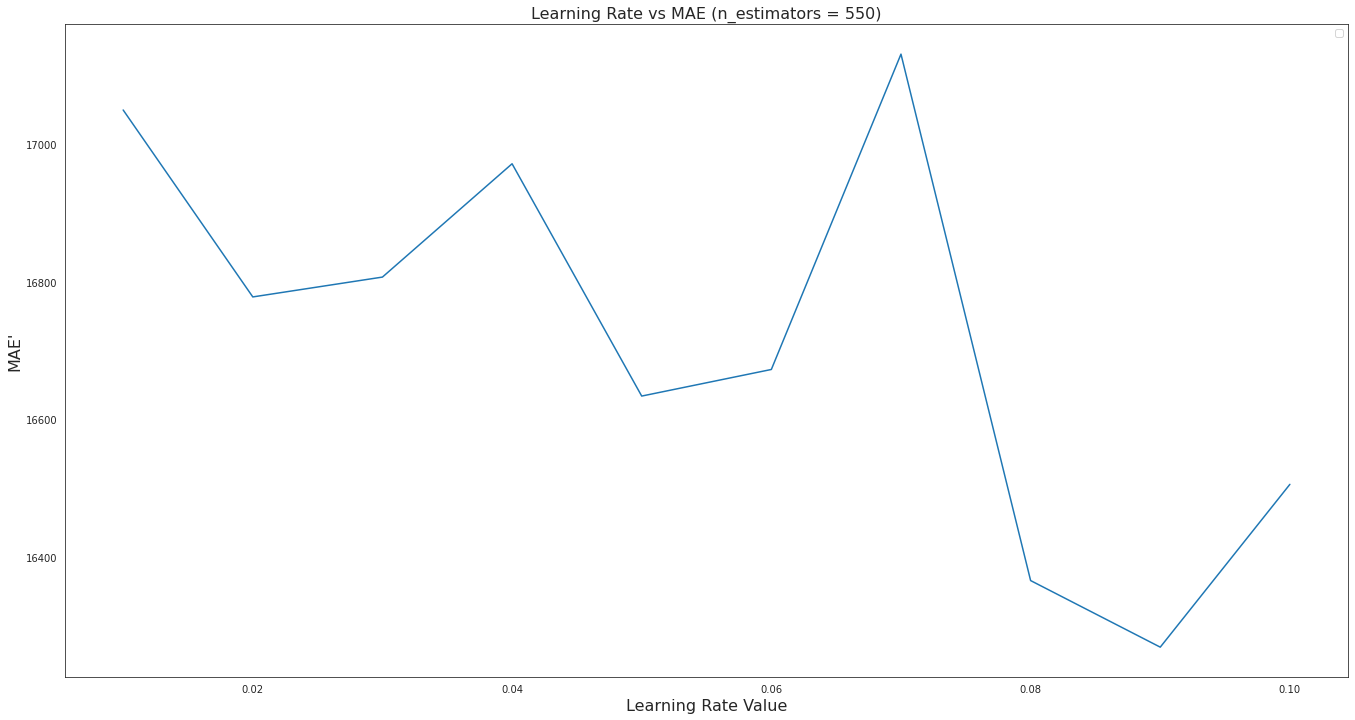

In [20]:
plt.figure(figsize=(23,12))
sns.set_style("white")
plt.xlabel("Learning Rate Value",fontsize=16)
plt.ylabel("MAE'",fontsize=16)
plt.title("Learning Rate vs MAE (n_estimators = 550)",fontsize=16)
plt.plot(np.arange(0.01,0.11,0.01),maes_XGB)
plt.legend()
plt.show()

Como pode-se observar pelo gráfico acima, para n_estimators = 500, o valor da taxa de aprendizagem para o modelo XGBRegressor que produz o menor MAE associado é 0.09. O Erro Médio Absoluto associado gira em torno de $16.2k, o que é consideravelmente mais baixo do que o melhor resultado obtido com o modelo RandomForestRegressor. 

# 8 Conclusões
* Pode-se considerar que os objetivos previamente estabelecidos foram alcançados. Encontrou-se, para o algoritmo RandomForestRegressor, os parâmetros, que para um vasto conjunto de valores de estimadores, que produzem o menor Erro Médio Absoluto. Levando em conta a complexidade computacional, um número de estimadores inferior a 550 produz resultados de predição imprecisos. Valores superiores não compensam em termos de MAE. Além disso, observou-se que diferentes estratégias de *feature engineering* produzem resultados distintos em termos da precisão. No caso do modelo avaliado, os melhores resultados foram obtidos ao selecionar-se colunas presentes, simultaneamente, no conjunto de dados de Teste e Validação e ao retirar-se colunas que apresentavam baixa correlação com a coluna SalePrice.
* Quanto ao XGBRegressor, observou-se que, para um conjunto de valores variáveis de taxa de aprendizagem, learning_rate = 0.09 produz um modelo com a menor MAE. Ademais, o modelo mostrou-se consideravelmente mais preciso do que os anteriores, apresentando um MAE inferior aos seus concorrentes.
* Observa-se que diferentes features no conjunto de dados podem possuir diferentes faixas de valores. Essa variação considerável pode produzir uma assimetria na distribuição que seria a ideal: a distribuição simétrica. Propõe-se, para trabalhos futuros, a aplicação de uma transformação logarítmica na coluna SalePrice, de modo que a nova curva se aproxime da distribuição normal. Além disso, propõe-se uma análise um pouco mais minuciosa dos outliers das variáveis, removendo-os se possível.